https://srome.github.io/Parsing-HTML-Tables-in-Python-with-BeautifulSoup-and-pandas/

In [1]:
import pandas as pd
from bs4 import BeautifulSoup

html_string = '''
  <table>
        <tr>
            <td> Hello! </td>
            <td> Table </td>
        </tr>
    </table>
'''

soup = BeautifulSoup(html_string, 'lxml') # Parse the HTML as a string

table = soup.find_all('table')[0] # Grab the first table

new_table = pd.DataFrame(columns=range(0,2), index = [0]) # I know the size 

row_marker = 0
for row in table.find_all('tr'):
    column_marker = 0
    columns = row.find_all('td')
    for column in columns:
        new_table.iat[row_marker,column_marker] = column.get_text()
        column_marker += 1

new_table

,0,1
0,Hello!,Table


In [2]:
import requests
url = "https://www.fantasypros.com/nfl/reports/leaders/qb.php?year=2015"
response = requests.get(url)
response.text[:100] # Access the HTML with the text property

'<!DOCTYPE html>\n<html lang="en">\n\n<head>\n    \n    <title>Fantasy Football Leaders Weeks 1 to 17 - QB'

In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

class HTMLTableParser:
    
    def parse_url(self, url):
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        return [(table['id'],self.parse_html_table(table))\
                for table in soup.find_all('table')]  

    def parse_html_table(self, table):
        n_columns = 0
        n_rows=0
        column_names = []

        # Find number of rows and columns
        # we also find the column titles if we can
        for row in table.find_all('tr'):
            
            # Determine the number of rows in the table
            td_tags = row.find_all('td')
            if len(td_tags) > 0:
                n_rows+=1
                if n_columns == 0:
                    # Set the number of columns for our table
                    n_columns = len(td_tags)
                    
            # Handle column names if we find them
            th_tags = row.find_all('th') 
            if len(th_tags) > 0 and len(column_names) == 0:
                for th in th_tags:
                    column_names.append(th.get_text())

        # Safeguard on Column Titles
        if len(column_names) > 0 and len(column_names) != n_columns:
            raise Exception("Column titles do not match the number of columns")

        columns = column_names if len(column_names) > 0 else range(0,n_columns)
        df = pd.DataFrame(columns = columns,
                            index= range(0,n_rows))
        row_marker = 0
        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')
            for column in columns:
                df.iat[row_marker,column_marker] = column.get_text()
                column_marker += 1
            if len(columns) > 0:
                row_marker += 1
                
        # Convert to float if possible
        for col in df:
            try:
                df[col] = df[col].astype(float)
            except ValueError:
                pass
        
        return df

In [4]:
hp = HTMLTableParser()
table = hp.parse_url(url)[0][1] # Grabbing the table from the tuple
table.head()

,Rank,Player,Team,Points,Games,Avg
0,1.0,Cam Newton,NE,389.08,16.0,24.32
1,2.0,Tom Brady,TB,343.70,16.0,21.48
2,3.0,Russell Wilson,SEA,336.36,16.0,21.02
3,4.0,Blake Bortles,DEN,316.12,16.0,19.76
4,5.0,Carson Palmer,FA,309.24,16.0,19.33


Text(0.5, 1.0, 'Average QB Points Per Game in 2015')

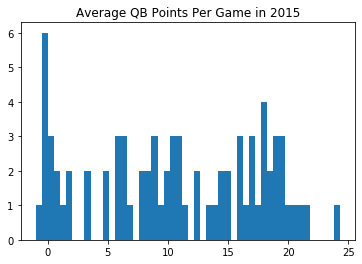

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
avg=table['Avg'].values
plt.hist(avg, bins = 50)
plt.title('Average QB Points Per Game in 2015')

In [12]:
l = list(range(4))

In [13]:
l

[0, 1, 2, 3]

In [14]:
l.insert(0,100)

In [15]:
l

[100, 0, 1, 2, 3]

In [17]:
import pandas

d1 = {"Name": ["Pankaj", "Lisa"], "ID": [1, 2]}
d2 = {"Name": "David", "ID": 3}

df1 = pandas.DataFrame(d1, index={1, 2})
df2 = pandas.DataFrame(d2, index={3})

In [18]:
df = df1.copy()

In [19]:
df

,Name,ID
1,Pankaj,1
2,Lisa,2


In [21]:
df = pandas.concat([df,df2])

In [22]:
df

,Name,ID
1,Pankaj,1
2,Lisa,2
3,David,3


In [16]:
print('********\n', df1)
print('********\n', df2)

df3 = pandas.concat([df1, df2])

print('********\n', df3)

********
      Name  ID
1  Pankaj   1
2    Lisa   2
********
     Name  ID
3  David   3
********
      Name  ID
1  Pankaj   1
2    Lisa   2
3   David   3
